In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


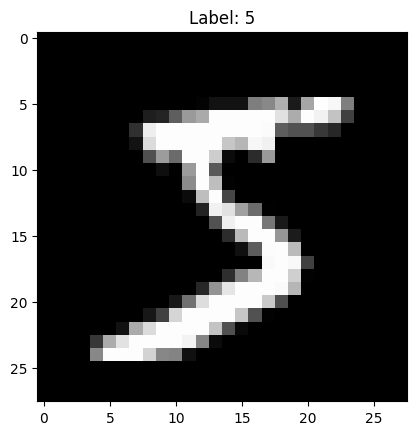

In [3]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [4]:
# Normalize pixel values (0 to 1 instead of 0 to 255)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels (0 to 9) into one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Converts 2D image to 1D vector
    Dense(128, activation='relu'),     # Hidden layer
    Dense(10, activation='softmax')    # Output layer for 10 classes
])


f:\anaconda\envs\handwritten\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8672 - loss: 0.4782 - val_accuracy: 0.9556 - val_loss: 0.1563
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9623 - loss: 0.1287 - val_accuracy: 0.9651 - val_loss: 0.1155
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9744 - loss: 0.0887 - val_accuracy: 0.9716 - val_loss: 0.0940
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9823 - loss: 0.0613 - val_accuracy: 0.9728 - val_loss: 0.0877
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9869 - loss: 0.0448 - val_accuracy: 0.9727 - val_loss: 0.0917


In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9710 - loss: 0.0989
Test accuracy: 0.9736999869346619


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


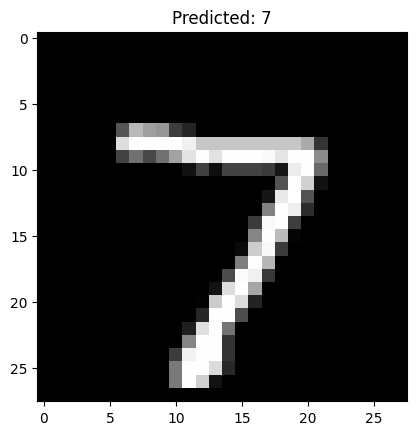

In [9]:
predictions = model.predict(x_test)

# Get the digit with highest probability
predicted_digit = np.argmax(predictions[0])

plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.show()
